<h2><center> International e-workshop on Machine learning applications in drug discovery: basic to advanced<br><font color='green'>Author: Kalyani Dhusia <br> Dated: 05.21.2021</font> </center></h2>

##### <font color='maroon'>Module 2: Introduction to machine learning (Lecture cum Hands-on session)<br>  <br>  • Examples of machine learning in protein bioinformatics<br>  • Brief introduction to machine learning methods including<br>  • decision trees and random forests<br>  • support vector machine<br> </font>
 





In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import cm
sns.set_style('ticks')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import os

## <font color = "teal">Framework </font>
The dataset consists of many different types of macromolecules of biological signifiance. The majority of the data records are of proteins. With DNA being the precursor to RNA, which when translated, proteins are the biomolecules that are directly interacting in biological pathways and cycles. Proteins are usually centered around one or a few job which is defined by their family type. For example, we can have a protein that is from a Hydrolase group, which focuses on catalyzing hydrolysis (breaking bonds by adding water) in order to help promote destruction of chains of proteins, or other molecules. Another example would be a protein that is a transport protein, which allows other molecules such as sucrose, fructose, or even water come in and outside of the cell.

### <font color = "teal">Objective</font>
With these proteins having different family types, a question arises if it's possible to determine a protein's family type based on sequence. There are notable search engines such as BLAST which has this capability, but it'd be interesting to see if a machine learning approach can do a good job in classifying a protein's family based on the protein sequence.
Many combination of structures are available for proteins involved in the central processes of life, however it can be a challenge to find the information that we need, since protein data bank archives so many different structures, often with multiple combination of structures for a given molecule, or partial structures, or structures that have been modified from their native form. Performance was measured for identification scenarios.

In [3]:
# Import Dataset
df_dup = pd.read_csv('./data/pdb_data_no_dups.csv')
df_seq = pd.read_csv('./data/pdb_data_seq.csv')

In [4]:
#visualise datasets
df_dup.head(2)

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0


In [5]:
#visualise datasets
df_seq.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [6]:
# Merge the two Data set together
df_merge = df_dup.merge(df_seq,how='inner',on='structureId')
#rename the dataset as per our convinience (for better understanding)
df_merge.rename({'macromoleculeType_x':'macromoleculeType','residueCount_y':'residueCount'},axis=1,inplace=True)
#delete unnecessary columns 
df_merge.drop(['macromoleculeType_y','residueCount_x'],axis=1,inplace=True)

In [7]:
df_merge.head()

,structureId,classification,experimentalTechnique,macromoleculeType,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,A,CCGGCGCCGG,20
1,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,B,CCGGCGCCGG,20
2,101D,DNA,X-RAY DIFFRACTION,DNA,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,A,CGCGAATTCGCG,24
3,101D,DNA,X-RAY DIFFRACTION,DNA,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,B,CGCGAATTCGCG,24
4,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154


In [8]:
df_isnull = pd.DataFrame(round((df_merge.isnull().sum().sort_values(ascending=False)/df_merge.shape[0])*100,1)).reset_index()
df_isnull.columns = ['Columns', '% of Missing Data']
df_isnull.style.format({'% of Missing Data': lambda x:'{:.1%}'.format(abs(x))})
cm = sns.light_palette("turquoise", as_cmap=True)
df_isnull = df_isnull.style.background_gradient(cmap=cm)
df_isnull

,Columns,% of Missing Data
0,crystallizationMethod,33.2
1,crystallizationTempK,32.6
2,phValue,27.7
3,pdbxDetails,18.2
4,densityMatthews,17.3
5,densityPercentSol,17.3
6,publicationYear,12.2
7,macromoleculeType,7.6
8,resolution,4.6
9,sequence,0


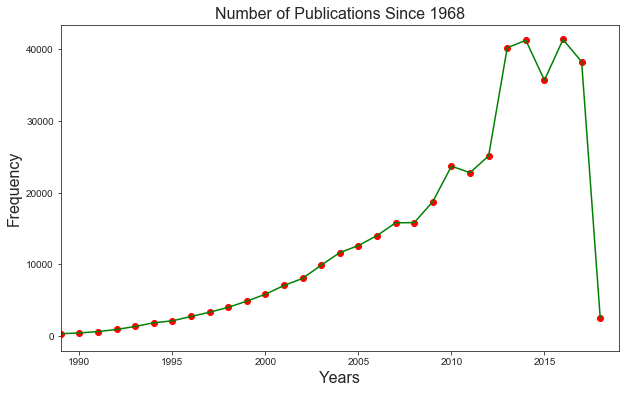

<Figure size 432x288 with 0 Axes>

In [9]:
df_pub_year = df_merge.dropna(subset=['publicationYear']) #dropping the missing values from the publicationYear only
#graph
x1= df_pub_year.publicationYear.value_counts().sort_index().index
y1 = df_pub_year.publicationYear.value_counts().sort_index().values

plt.subplots(figsize=(10, 6))
plt.scatter(x1,y1,color='r')
plt.plot(x1,y1,color='g')
plt.xlim([1989, 2019])
plt.title("Number of Publications Since 1968", fontsize="16")
plt.xlabel("Years",fontsize="16")
plt.ylabel("Frequency",fontsize="16")
plt.show()
plt.savefig("./img/publications.png")

In [10]:
popular_exp_tech = df_merge.experimentalTechnique.value_counts()[:3] # Extract the 3 top used Exp Tech 
popular_exp_tech_df = pd.DataFrame(popular_exp_tech).reset_index()
popular_exp_tech_df.columns=['Experimental Technique','values']
# ADDING A ROW FOR THE ORTHER EXPERIMENTAL TECHNIQUE USED. PLEASE PUT IN MIND THAT TO ORTHER TECHNIQUES 
#IS JUST A GROUP OF THE REST OF THECNIQUES USED
popular_exp_tech_df.loc[3]  = ['OTHER TECHNIQUE', 449]
print ('The X-RAY DIFFRACTION is by far the most used Experimental Technique during the Study of the Protein Sequences')
#Let's calculate the percentage value
df = popular_exp_tech_df['values'].div(popular_exp_tech_df['values'].sum(), axis=0).multiply(100)
print(df)

The X-RAY DIFFRACTION is by far the most used Experimental Technique during the Study of the Protein Sequences
0    86.218742
1    10.441596
2     3.244212
3     0.095449
Name: values, dtype: float64


In [11]:
popular_exp_tech.head()

X-RAY DIFFRACTION      405579
ELECTRON MICROSCOPY     49118
SOLUTION NMR            15261
Name: experimentalTechnique, dtype: int64

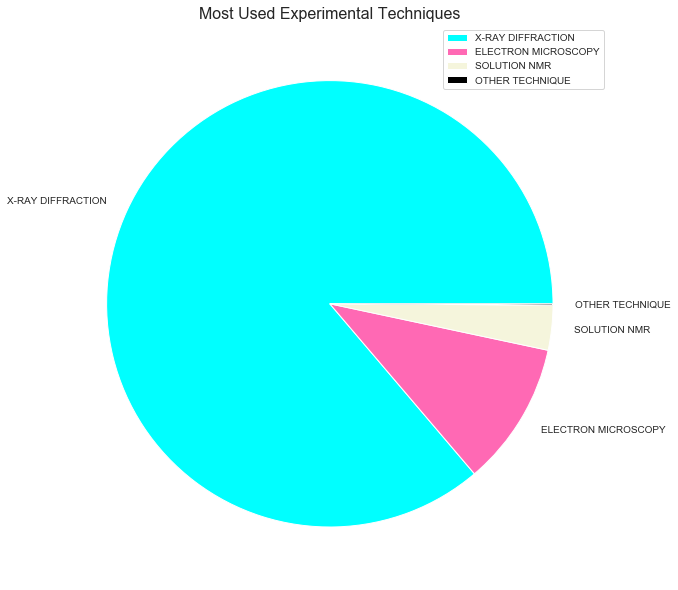

<Figure size 432x288 with 0 Axes>

In [12]:
mycolors = ["cyan", "hotpink", "beige", "black"]
plt.subplots(figsize=(10, 16))

plt.pie(np.array(df), labels = popular_exp_tech_df['Experimental Technique'], colors=mycolors)
plt.title("Most Used Experimental Techniques", fontsize="16")
plt.legend(loc='upper right')
plt.show()
plt.savefig("./img/experiment_technique.png")

In [13]:
#classification distribution
clasific =df_merge.classification.value_counts(ascending=False)
df_class = pd.DataFrame(round(((clasific/df_merge.shape[0])*100),2).head(10)).reset_index()
df_class.columns = ['Classification', 'percent_value']
count = len(df_class['Classification'].unique())
#print(len(count))
print(df_class.head(3))
print('\n')
print('There are {} Unique Classification Types and the top 3 accounts for more than 50% of the classification in the dataset'.format(count))

  Classification  percent_value
0       RIBOSOME          12.89
1      HYDROLASE          10.15
2    TRANSFERASE           8.01


There are 10 Unique Classification Types and the top 3 accounts for more than 50% of the classification in the dataset


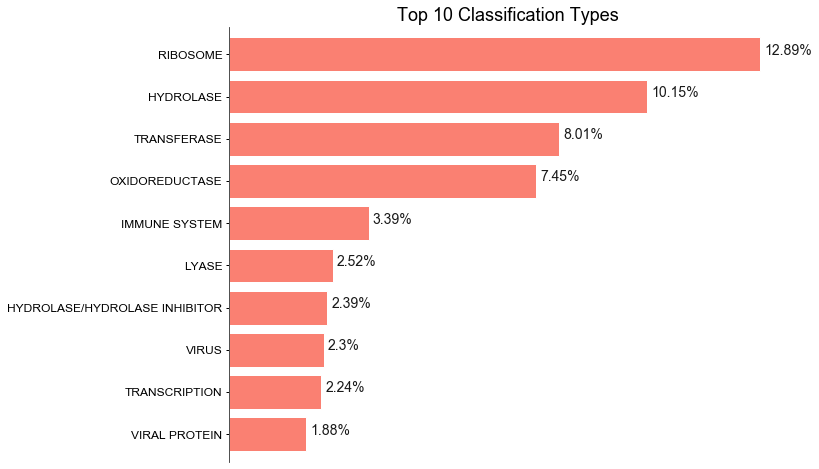

In [14]:
f,ax = plt.subplots(figsize=(10,8))
df_class.plot(kind = 'barh',ax=ax,color='salmon',legend=None,width= 0.8)
# get_width pulls left or right; get_y pushes up or down
for i in ax.patches:
    ax.text(i.get_width()+.1, i.get_y()+.40, \
            str(round((i.get_width()), 2))+'%', fontsize=14, color='black',alpha=0.9)  
#Set ylabel
ax.set_yticklabels(df_class['Classification'])
# invert for largest on top 
ax.invert_yaxis()
kwargs= {'length':3, 'width':1, 'colors':'black','labelsize':'large'}
ax.tick_params(**kwargs)
x_axis = ax.axes.get_xaxis().set_visible(False)
ax.set_title ('Top 10 Classification Types',color='black',fontsize=18)
sns.despine(bottom=True)
plt.savefig('./img/top10class.png')

### <font color = "teal">Analysis Results (part I)</font>
This is what we have found So far
1. The most analyzed macromolecule Type is Protein
2. The most used Experimental Technique is the X_RAY DIFFRACTION
3. There are 5050 Uniques classification type in the dataset and the highest classification type is less than   15%
4. The macromolecule Type has less than 3% of missing values whereas the experimental Technique columns don't have any missing values
5. We will reduce our data set to Experimental Technique = 'X-RAY DIFFRACTION'  and drop all columns with missing values percentage greater than 15%
6. The Dataset is very large and contains **352125** classification types. I will reduce to classification to 10, the 3 most used classifications, which are **HYDROLASE, TRANSFERASE AND OXIDOREDUCTASE**. This is for practice purpose only. 

In [15]:
df_class.Classification.values.tolist()[0:4]
#df_class.head()

['RIBOSOME', 'HYDROLASE', 'TRANSFERASE', 'OXIDOREDUCTASE']

In [16]:
macrotype = ['Protein','Protein#RNA']
df_protein = df_merge[(df_merge['experimentalTechnique'] =='X-RAY DIFFRACTION') & 
                      (df_merge['macromoleculeType'].isin(macrotype))&
                     (df_merge['classification'].isin(df_class.Classification.values.tolist()[0:4]))]

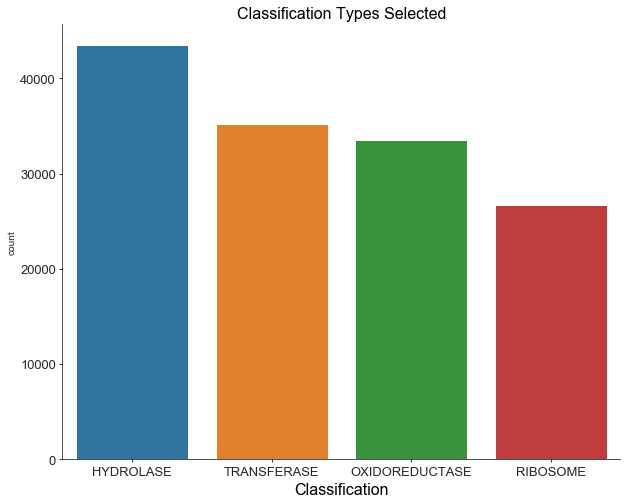

In [17]:
df_protein.reset_index(drop=True,inplace=True)
columns = ['crystallizationMethod' ,'pdbxDetails', 'publicationYear','phValue','crystallizationTempK']

#Dropping columns with missing value above 15%
df_protein.drop(columns=columns,inplace=True)

# Classification Type that will be used from now on
f,ax= plt.subplots(figsize=(10,8))
sns.countplot('classification',data=df_protein, ax=ax)
ax.set_title('Classification Types Selected',fontsize=16,color='black')
ax.tick_params(length =3,labelsize=13,color='black')
ax.set_xlabel('Classification',color='black',fontsize=16)
sns.despine()
plt.savefig('./img/top3class.png')


### <font color = "teal">Feature engineering</font>

Steps which are involved while solving any problem in machine learning are as follows:<br>
• Gathering data.<br>
• Cleaning data.<br>
• Feature engineering.<br>
• Defining model.<br>
• Training, testing model and predicting the output.<br><br>
*Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.* Now since we have better understanding of the dataset, we could emply some of the basic machine learning techniques.<br>
First on which we would use "Feature Engineering"
 

In [18]:
class_dict = {'RIBOSOME':0,'HYDROLASE':1,'TRANSFERASE':2,'OXIDOREDUCTASE':3} 
#class_dict = {'HYDROLASE':1,'TRANSFERASE':2,'OXIDOREDUCTASE':3}
df_protein['class'] = df_protein.classification.map(class_dict)
#Reduce the dataset to only numerical column and clssification column
columns = ['resolution','structureMolecularWeight','densityMatthews','densityPercentSol',
           'residueCount','class']
df_ml = df_protein[columns]
df_ml.dropna(inplace=True)
df_ml.head()

,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,residueCount,class
0,2.15,65203.21,2.71,54.69,572,1
1,2.15,65203.21,2.71,54.69,572,1
2,2.06,28700.28,2.48,50.36,248,1
3,2.06,28700.28,2.48,50.36,248,1
4,1.90,30391.41,2.40,48.68,248,1


Pearson Correlation Matrix Analysis

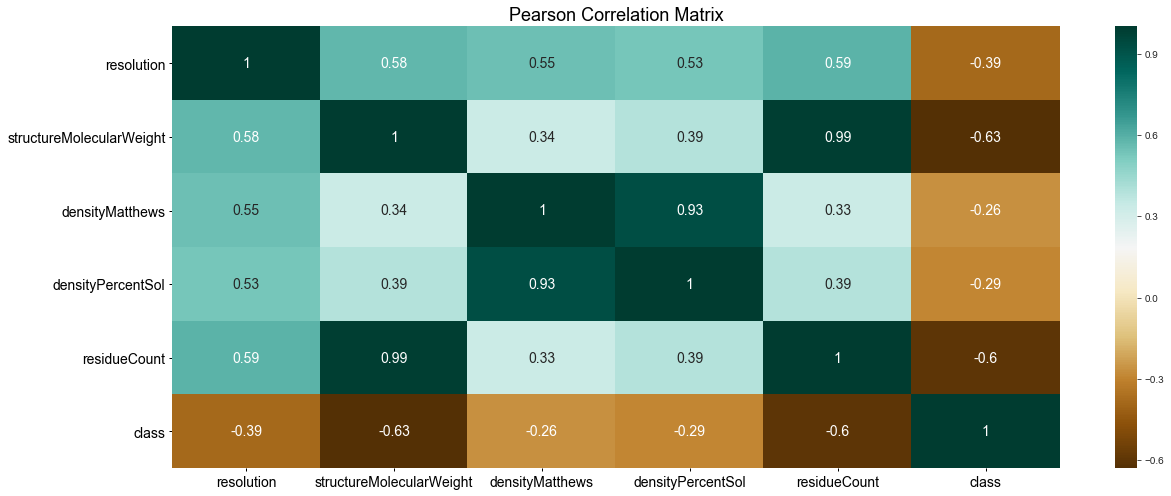

<Figure size 432x288 with 0 Axes>

In [19]:
colormap = plt.cm.BrBG     #Dark2_r#pastel#hls#Paired#Set2
f, ax = plt.subplots(figsize=(18,7))
sns.heatmap(df_ml.corr(),cmap= colormap,annot=True,ax=ax,annot_kws ={'fontsize':14})
kwargs= {'length':3, 'width':1, 'colors':'black','labelsize':14}
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.tick_params(**kwargs)
ax.tick_params(**kwargs,axis='x')
plt.title ('Pearson Correlation Matrix', color = 'black',fontsize=18)
plt.tight_layout()
plt.show()
plt.savefig("./img/pearson.png")

<br>

**What can we learn from the plot** <br>
There is a very strong Correlation between Density Matthews values and Density Percent Sol, ResidueCount and Structure Molecular Weight. Both parameters also have a weak correlation with Resolution, Residue Count and Struture Molecular Weight. Some features have low pearson correlation but I will keep and use them in the Machine learning model for learning purpose

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df_ml.drop('class',axis = 1)
y = df_ml['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Standardizing the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Simple Machine Learning Analysis

In [21]:
# Let's try a single model first, Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
prediction = dict()
model = LogisticRegression()
model.fit(X_train, y_train)
LR_pred = model.predict(X_test)
prediction["LogisticRegression"] = accuracy_score(LR_pred, y_test)
print( prediction['LogisticRegression'])

0.5077258680239957


In [22]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5242
           1       0.39      0.80      0.52      8569
           2       0.42      0.18      0.25      7001
           3       0.40      0.10      0.16      6693

    accuracy                           0.51     27505
   macro avg       0.55      0.52      0.48     27505
weighted avg       0.52      0.51      0.45     27505



In [23]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test, LR_pred)
conf_mat

array([[5219,   15,    8,    0],
       [   0, 6841, 1087,  641],
       [   0, 5419, 1259,  323],
       [   4, 5399,  644,  646]])

Text(34.0, 0.5, 'Truth')

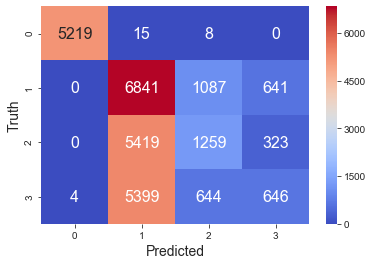

In [24]:
#sns.heatmap(conf_mat, annot=True, fmt="d", cmap="tab10")
ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="coolwarm", annot_kws={"size":16})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Truth',fontsize=14)

<br>

### Multiple Machine Learning Analysis

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.neural_network import MLPClassifier

In [26]:
class_dict = {'HYDROLASE':1,'TRANSFERASE':2,'OXIDOREDUCTASE':3}
df_protein['class'] = df_protein.classification.map(class_dict)
#Reduce the dataset to only numerical column and clssification column
columns = ['resolution','structureMolecularWeight','densityMatthews','densityPercentSol',
           'residueCount','class']
df_ml = df_protein[columns]
df_ml.dropna(inplace=True)
df_ml.head()

,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,residueCount,class
0,2.15,65203.21,2.71,54.69,572,1.0
1,2.15,65203.21,2.71,54.69,572,1.0
2,2.06,28700.28,2.48,50.36,248,1.0
3,2.06,28700.28,2.48,50.36,248,1.0
4,1.90,30391.41,2.40,48.68,248,1.0


In [27]:
X = df_ml.drop('class',axis = 1)
y = df_ml['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Standardizing the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
def model_select(classifier):
    cv_result = []
    cv_means = []
    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits=5)
    cv_result.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))
    cv_means.append(np.mean(cv_result))
    return cv_means

In [29]:
# Fitting all the models 
model_type = [KNeighborsClassifier(),GaussianNB(),RandomForestClassifier(),
              AdaBoostClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier(),ExtraTreesClassifier()]

In [30]:
# Fitting all the models 
model_type = [KNeighborsClassifier(),GaussianNB(),RandomForestClassifier(),
              AdaBoostClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier(),ExtraTreesClassifier()]
model_score = [model_select(i) for i in model_type]

In [31]:
model_score

[[0.6840172116236245],
 [0.383124666608919],
 [0.8881267474697492],
 [0.4661874687585435],
 [0.5218548693583183],
 [0.8811879091187848],
 [0.8920676138638332]]

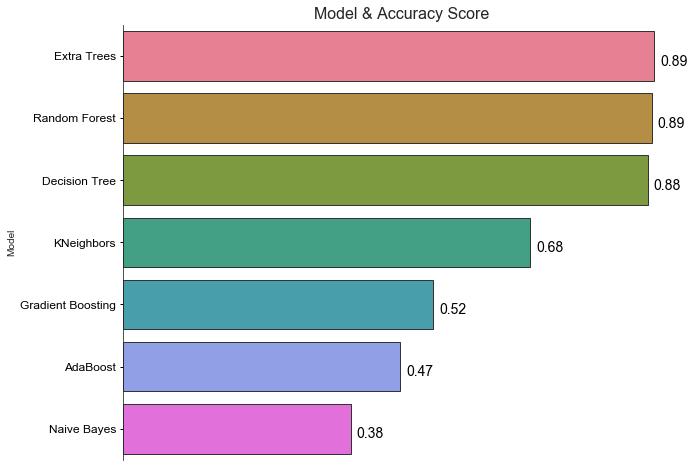

<Figure size 432x288 with 0 Axes>

In [32]:
classifier = ['KNeighbors','Naive Bayes','Random Forest', 
             'AdaBoost','Gradient Boosting','Decision Tree','Extra Trees']
# Place result in a data Frame
ml_model = pd.DataFrame(model_score,classifier).reset_index()
ml_model.columns=['Model','acc_score']
ml_model.sort_values('acc_score',ascending = False,inplace=True)
ml_model.reset_index(drop=True,inplace = True)
f, ax = plt.subplots(figsize=(10,8))
sns.barplot('acc_score','Model',data=ml_model, ax=ax,palette='husl',edgecolor=".2")
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+.55, \
        str(round((i.get_width()), 2)), fontsize=14, color='black') 
kwargs= {'length':3, 'width':1, 'colors':'black','labelsize':'large'}
ax.tick_params(**kwargs)
x_axis = ax.axes.get_xaxis().set_visible(False)
ax.set_title('Model & Accuracy Score',fontsize=16)
sns.despine(bottom=True)
plt.show()
plt.savefig("./img/multiple_classification.png")

In [33]:
import itertools
# Compute confusion matrix
def single_model(model):
    clf = model
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    conf_mx = confusion_matrix(y_pred,y_test)
    return conf_mx

In [34]:
#plot confusion matrix    
def plot_confusion_matrix(cm, classes,model_name):

    plt.figure(figsize=(8,6))
    cmap = plt.cm.BuGn
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix: '+ model_name, fontsize=15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,  size = 12,rotation=0)
    plt.yticks(tick_marks, classes, size = 12, rotation=90)
    plt.ylim([2.5, -.4])
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",fontsize=14)

    plt.tight_layout()
    plt.ylabel('True label',fontsize=14,color='black')
    plt.xlabel('Predicted label',fontsize=14,color='black' )
    #np.set_printoptions(precision=2)
    
    return plt.show()

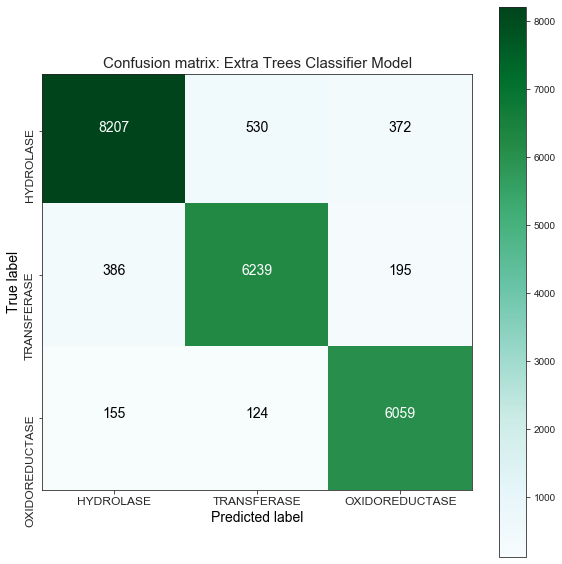

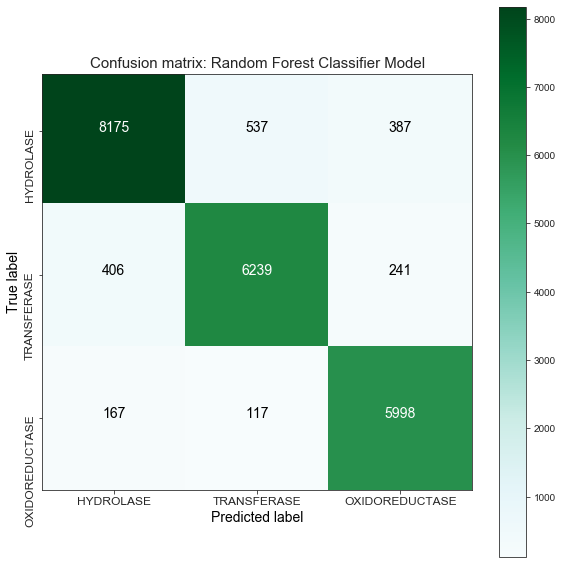

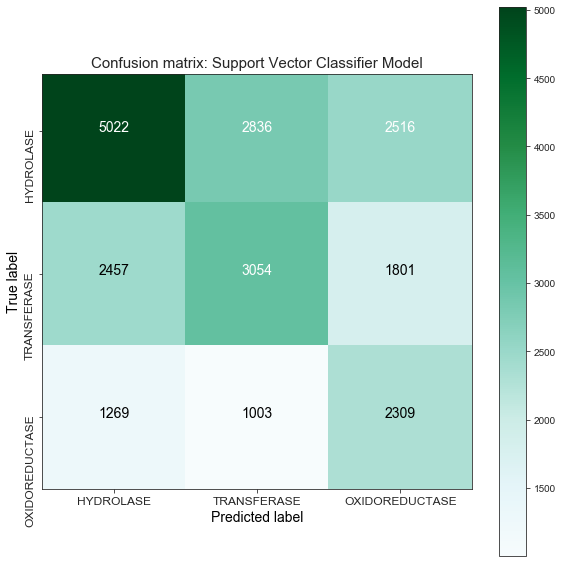

In [35]:
classes = ['HYDROLASE','TRANSFERASE','OXIDOREDUCTASE']
plot_confusion_matrix(single_model(ExtraTreesClassifier()), classes,'Extra Trees Classifier Model')
plot_confusion_matrix(single_model(RandomForestClassifier()), classes,'Random Forest Classifier Model')
plot_confusion_matrix(single_model(SVC()), classes,'Support Vector Classifier Model')

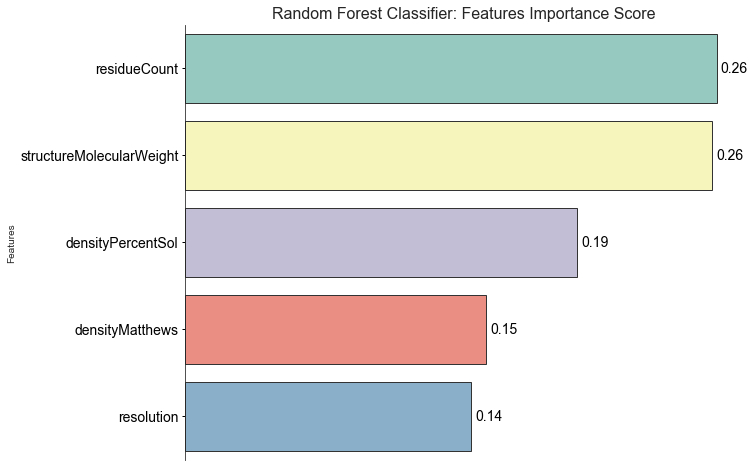

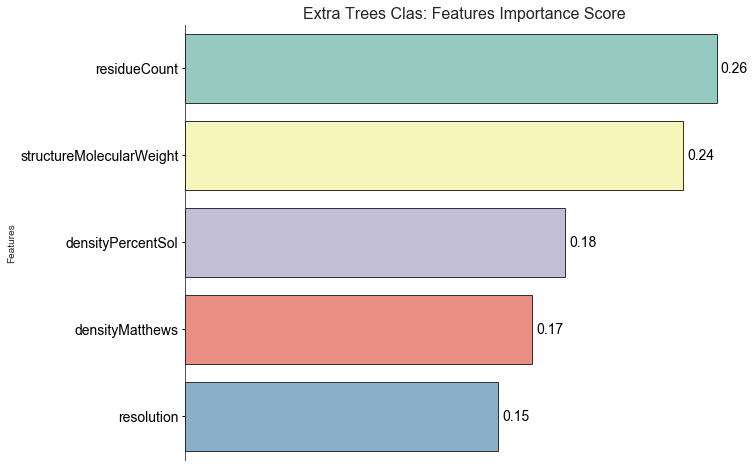

In [36]:
def sing_model(model,input):
    clf = model
    clf.fit(X_train,y_train)
    model_fi = clf.feature_importances_
    feat_imp = pd.DataFrame(model_fi,df_ml.columns[:-1]).reset_index()
    feat_imp.columns = ['Features','Importance_score']
    feat_imp.sort_values('Importance_score',ascending=False,inplace=True)
    feat_imp.reset_index(drop=True,inplace = True)
    f, ax = plt.subplots(figsize=(10,8))
    sns.barplot('Importance_score','Features',data=feat_imp, ax=ax,palette='Set3',edgecolor=".2")
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+.002, i.get_y()+.45, \
            str(round((i.get_width()), 2)), fontsize=14, color='black') 
    kwargs= {'length':3, 'width':1, 'colors':'black'}
    ax.tick_params(**kwargs, labelsize=14)
    x_axis = ax.axes.get_xaxis().set_visible(False)
    ax.set_title(input +':'+ ' Features Importance Score',fontsize=16)
    sns.despine(bottom=True)
    return plt.show()
sing_model(RandomForestClassifier(),'Random Forest Classifier')
sing_model(ExtraTreesClassifier(),'Extra Trees Clas')

<br>

### <font color="teal"> Learning Analysis</font><br>
* Training score (red line) is at its maximum regardless of training examples. This shows severe overfitting<br>
* Cross-validation score (green line) increases as the training set sample increases but the huge gap between cross-validation score and training score indicates high variance problem.<br>
* To solve issue like this, may be data collections or extra features can help with the high variance<br>

### <font color="teal"> Summary</font><br>
* This is a large dataset with a lot of Classification types. I reduce the dataset to three classification type to be able to analyze it on my PC.
* I Do Not know if we apply my methodology to all the dataset on a powerful computer (may be cloud computing), my result will be valide.

<br>


### <font color="brown"><center> ********************************* End of Chapter 2  ********************************* </center> </font>